# This script contains the following:
# 1. Import data and libraries
# 2. Data cleaning and understanding : Data cleaning, Data wrangling
# 3. Exploring Relationships : Correlations, Heatmap, Scatterplots,  Pair Plots, Categorical Plots, Regression Analysis, k-means clustering, Time Series Analysis, Time-series analysis: decomposition, Testing for stationarity
# 4. Exporting the data

# 1. Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import statsmodels.api as sm
import warnings # This is a library that handles warnings
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
    # feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') #This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
#   https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
import quandl

In [107]:
df = pd.read_csv(r'C:\Users\tee3a\3D Objects\Personal Project\02 Data\Original Data for raw data sets\listings.csv', index_col = False)

In [108]:
path = r'C:\Users\tee3a\3D Objects\Personal Project'

In [109]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data for raw data sets', 'listings.csv'), index_col = False)

Dataset description before check

In [110]:
# Configure API key   
quandl.ApiConfig.api_key = 'ef6U9zBqS7DpP3sny-Ak'

# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.
data = quandl.get('FRED/NROU')

In [111]:
df.shape

(20030, 16)

In [112]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# 2. Data cleaning and understanding
##### Data wrangling: 
##### Drop the unwanted column

In [113]:
df_drop = df.drop(columns = ['host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month'])

In [114]:
### Renaming the colums
df_drop.rename(columns={"name": "Name"}, inplace=True)
df_drop.rename(columns={"neighbourhood": "Neighbourhood"}, inplace=True)
df_drop.rename(columns={"latitude": "Latitude"}, inplace=True)
df_drop.rename(columns={"longitude": "Longitude"}, inplace=True)
df_drop.rename(columns={"room_type": "Room type"}, inplace=True)
df_drop.rename(columns={"price": "Price"}, inplace=True)
df_drop.rename(columns={"minimum_nights": "Minimum night"}, inplace=True)
df_drop.rename(columns={"availability_365": "Availability in 365 day"}, inplace=True)

##### Finding and Identifying the rows with missing values

In [115]:
df_drop.isnull().sum()

id                                 0
Name                              38
host_id                            0
Neighbourhood                      0
Latitude                           0
Longitude                          0
Room type                          0
Price                              0
Minimum night                      0
number_of_reviews                  0
calculated_host_listings_count     0
Availability in 365 day            0
dtype: int64

In [116]:
df_nan =  df_drop[df_drop['Name'].isnull() == True]

df_nan

,id,Name,host_id,Neighbourhood,Latitude,Longitude,Room type,Price,Minimum night,number_of_reviews,calculated_host_listings_count,Availability in 365 day
2378,3771282,NaN,10529642,De Pijp - Rivierenbuurt,52.354920,4.896281,Entire home/apt,214,6,7,1,0
2892,4683947,NaN,24220387,Zuid,52.347288,4.856014,Entire home/apt,100,1,1,1,0
3415,5763318,NaN,19035647,De Baarsjes - Oud-West,52.359968,4.858911,Private room,50,2,2,1,0
4105,6795287,NaN,35354864,Centrum-West,52.380624,4.885614,Entire home/apt,107,3,1,1,0
4180,6893255,NaN,4223835,De Baarsjes - Oud-West,52.367049,4.855081,Entire home/apt,100,3,16,1,0
4336,7171007,NaN,12493511,Centrum-West,52.373652,4.896037,Private room,100,1,4,1,0
4383,7232072,NaN,8561676,Bos en Lommer,52.379381,4.848022,Entire home/apt,79,1,2,1,0
4488,7359564,NaN,31024638,De Pijp - Rivierenbuurt,52.353953,4.891608,Entire home/apt,125,2,3,1,0
4546,7452777,NaN,13561102,De Baarsjes - Oud-West,52.365933,4.853901,Entire home/apt,80,3,7,1,0
4854,7898987,NaN,17530782,IJburg - Zeeburgereiland,52.375412,4.962881,Entire home/apt,150,1,0,1,0


####  Addressing Missing Values, code to replace your missing values

In [117]:
df_1 = df_drop[df_drop['Name'].isnull() == False]

In [118]:
df_1.shape

(19992, 12)

In [119]:
df_1.dtypes

id                                  int64
Name                               object
host_id                             int64
Neighbourhood                      object
Latitude                          float64
Longitude                         float64
Room type                          object
Price                               int64
Minimum night                       int64
number_of_reviews                   int64
calculated_host_listings_count      int64
Availability in 365 day             int64
dtype: object

In [120]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19992 entries, 0 to 20029
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19992 non-null  int64  
 1   Name                            19992 non-null  object 
 2   host_id                         19992 non-null  int64  
 3   Neighbourhood                   19992 non-null  object 
 4   Latitude                        19992 non-null  float64
 5   Longitude                       19992 non-null  float64
 6   Room type                       19992 non-null  object 
 7   Price                           19992 non-null  int64  
 8   Minimum night                   19992 non-null  int64  
 9   number_of_reviews               19992 non-null  int64  
 10  calculated_host_listings_count  19992 non-null  int64  
 11  Availability in 365 day         19992 non-null  int64  
dtypes: float64(2), int64(7), object(

In [121]:
#### converting 'Minimum nights' from object- str to  float64
df_1['Minimum night'] = df_1['Minimum night'].astype('float64')

#### Finding Duplicates

In [122]:
df_dups = df_1[df_1.duplicated()]

In [123]:
df_dups

,id,Name,host_id,Neighbourhood,Latitude,Longitude,Room type,Price,Minimum night,number_of_reviews,calculated_host_listings_count,Availability in 365 day


In [124]:
#### Identifying the rows with missing values
df_1.isnull().sum()

id                                0
Name                              0
host_id                           0
Neighbourhood                     0
Latitude                          0
Longitude                         0
Room type                         0
Price                             0
Minimum night                     0
number_of_reviews                 0
calculated_host_listings_count    0
Availability in 365 day           0
dtype: int64

#### Orders data dictionary

In [125]:
data_dict_ords = df_1.to_dict('index')

In [126]:
data_dict_ords

{0: {'id': 2818,
  'Name': 'Quiet Garden View Room & Super Fast WiFi',
  'host_id': 3159,
  'Neighbourhood': 'Oostelijk Havengebied - Indische Buurt',
  'Latitude': 52.365754513876176,
  'Longitude': 4.941419235184398,
  'Room type': 'Private room',
  'Price': 59,
  'Minimum night': 3.0,
  'number_of_reviews': 248,
  'calculated_host_listings_count': 1,
  'Availability in 365 day': 44},
 1: {'id': 3209,
  'Name': 'Quiet apt near center, great view',
  'host_id': 3806,
  'Neighbourhood': 'Westerpark',
  'Latitude': 52.39022505041117,
  'Longitude': 4.873924094742859,
  'Room type': 'Entire home/apt',
  'Price': 160,
  'Minimum night': 4.0,
  'number_of_reviews': 42,
  'calculated_host_listings_count': 1,
  'Availability in 365 day': 47},
 2: {'id': 20168,
  'Name': '100%Centre-Studio 1 Private Floor/Bathroom',
  'host_id': 59484,
  'Neighbourhood': 'Centrum-Oost',
  'Latitude': 52.36508702680917,
  'Longitude': 4.8935410078410095,
  'Room type': 'Entire home/apt',
  'Price': 80,
  'Mini

In [127]:
df_1.describe()

,id,host_id,Latitude,Longitude,Price,Minimum night,number_of_reviews,calculated_host_listings_count,Availability in 365 day
count,1.999200e+04,1.999200e+04,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000
mean,1.542761e+07,4.871805e+07,52.365212,4.888990,152.238145,3.329182,21.592337,4.741547,60.008603
std,8.573435e+06,5.653617e+07,0.015998,0.035582,145.914478,12.547625,43.274274,22.943113,104.072741
min,2.818000e+03,3.159000e+03,52.288378,4.753247,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.190806e+06,8.087309e+06,52.355124,4.863626,96.000000,2.000000,3.000000,1.000000,0.000000
50%,1.565531e+07,2.369450e+07,52.364585,4.886403,125.000000,2.000000,8.000000,1.000000,3.000000
75%,2.204280e+07,6.833823e+07,52.375073,4.908293,175.000000,3.000000,22.000000,1.000000,68.000000
max,3.058041e+07,2.293612e+08,52.424713,5.027689,8500.000000,1001.000000,695.000000,208.000000,365.000000


In [128]:
df_1['Name'].describe()

count         19992
unique        19503
top       Amsterdam
freq             39
Name: Name, dtype: object

In [129]:
df_1['Minimum night'].describe()

count    19992.000000
mean         3.329182
std         12.547625
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1001.000000
Name: Minimum night, dtype: float64

# 3. Exploring relationships:Correlations

In [130]:
matplotlib.__version__

'3.5.2'

In [131]:
##### Create a subset including the 'Latitude' , 'Longitude' , 'Price', 'Minimum night' , 'Availability in 365 day
df_1_sub = df_1[['Latitude' , 'Longitude' , 'Price', 'Minimum night' , 'Availability in 365 day']]
df_1_sub

,Latitude,Longitude,Price,Minimum night,Availability in 365 day
0,52.365755,4.941419,59,3.0,44
1,52.390225,4.873924,160,4.0,47
2,52.365087,4.893541,80,1.0,198
3,52.373114,4.883668,125,14.0,141
4,52.386727,4.892078,150,2.0,199
...,...,...,...,...,...
20025,52.345999,4.952145,340,7.0,11
20026,52.362412,4.932467,150,3.0,16
20027,52.362431,4.926912,80,10.0,210
20028,52.363780,4.932493,55,2.0,31


In [132]:
# Create a correlation matrix using pandas
df_1_sub.corr()

,Latitude,Longitude,Price,Minimum night,Availability in 365 day
Latitude,1.000000,-0.137527,0.006166,-0.007799,0.011274
Longitude,-0.137527,1.000000,0.017628,0.000978,0.015996
Price,0.006166,0.017628,1.000000,0.039115,0.159203
Minimum night,-0.007799,0.000978,0.039115,1.000000,0.059132
Availability in 365 day,0.011274,0.015996,0.159203,0.059132,1.000000


#####  The correlation matrix using pandas show there are weak and no correlation between the variables.

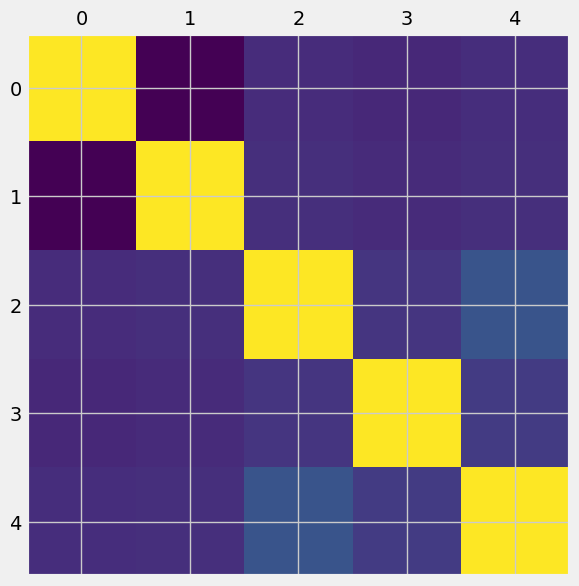

In [133]:
### Create a correlation heatmap using matplotlib
plt.matshow(df_1_sub.corr())
plt.show()

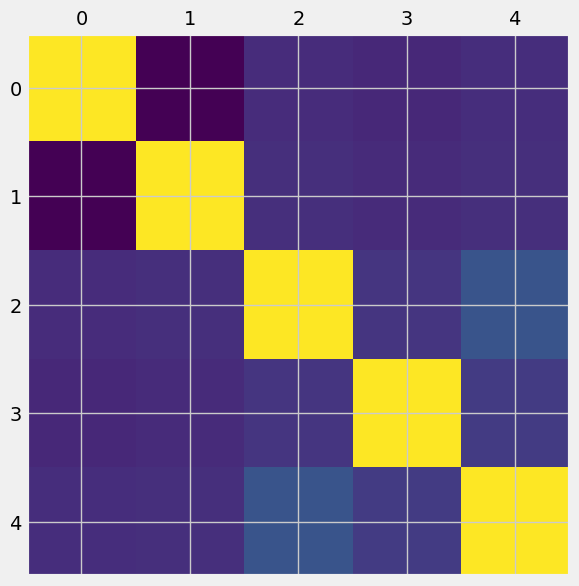

In [134]:
#### Save figure
plt.matshow(df_1_sub.corr())
plt.savefig("out1.png")

In [135]:
###### current dir
cwd = os.getcwd()
cwd

'C:\\Users\\tee3a\\3D Objects\\Personal Project\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

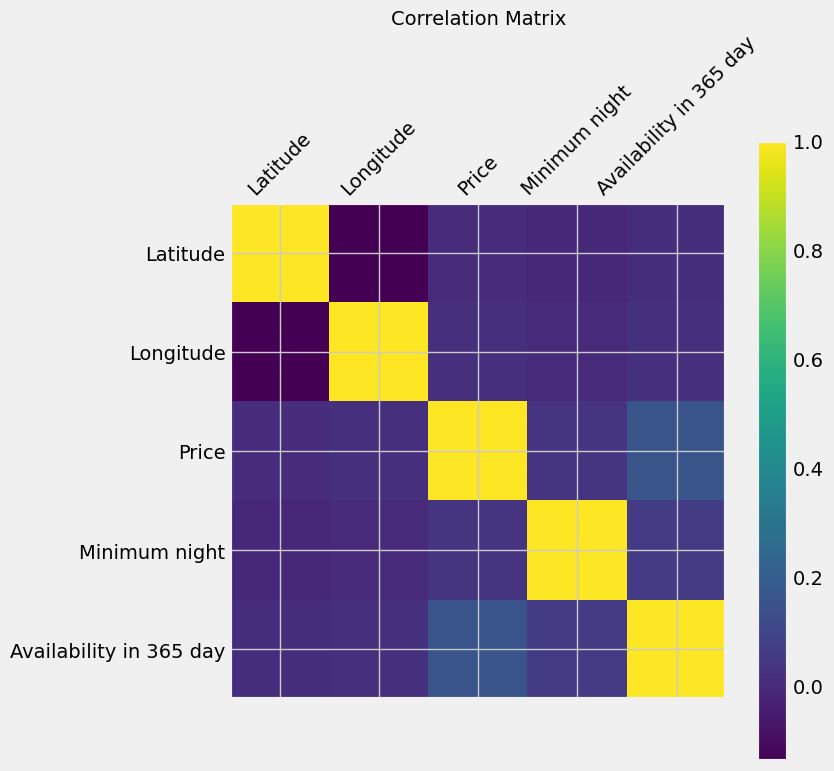

In [136]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(df_1_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_1_sub.shape[1]), df_1_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_1_sub.shape[1]), df_1_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#####  The correlation heatmap using matplotlib show there are weak and no correlation between the variables.

In [137]:
##### Create a subset including the 'Latitude', 'Longitude', 'Price'  'Minimum night', 'Availability in 365 day'
sub1 = df_1[['Latitude' , 'Longitude', 'Price', 'Minimum night', 'Availability in 365 day', 'Room type']]


In [138]:
#### Create a correlation heatmap using seaborn
##### Create a subset including the 'Latitude', 'Longitude', 'Price'  'Minimum night', 'Availability within 365 day'
sub = df_1[['Latitude' , 'Longitude', 'Price', 'Minimum night', 'Availability in 365 day']]
sub

,Latitude,Longitude,Price,Minimum night,Availability in 365 day
0,52.365755,4.941419,59,3.0,44
1,52.390225,4.873924,160,4.0,47
2,52.365087,4.893541,80,1.0,198
3,52.373114,4.883668,125,14.0,141
4,52.386727,4.892078,150,2.0,199
...,...,...,...,...,...
20025,52.345999,4.952145,340,7.0,11
20026,52.362412,4.932467,150,3.0,16
20027,52.362431,4.926912,80,10.0,210
20028,52.363780,4.932493,55,2.0,31


###### Heatmap

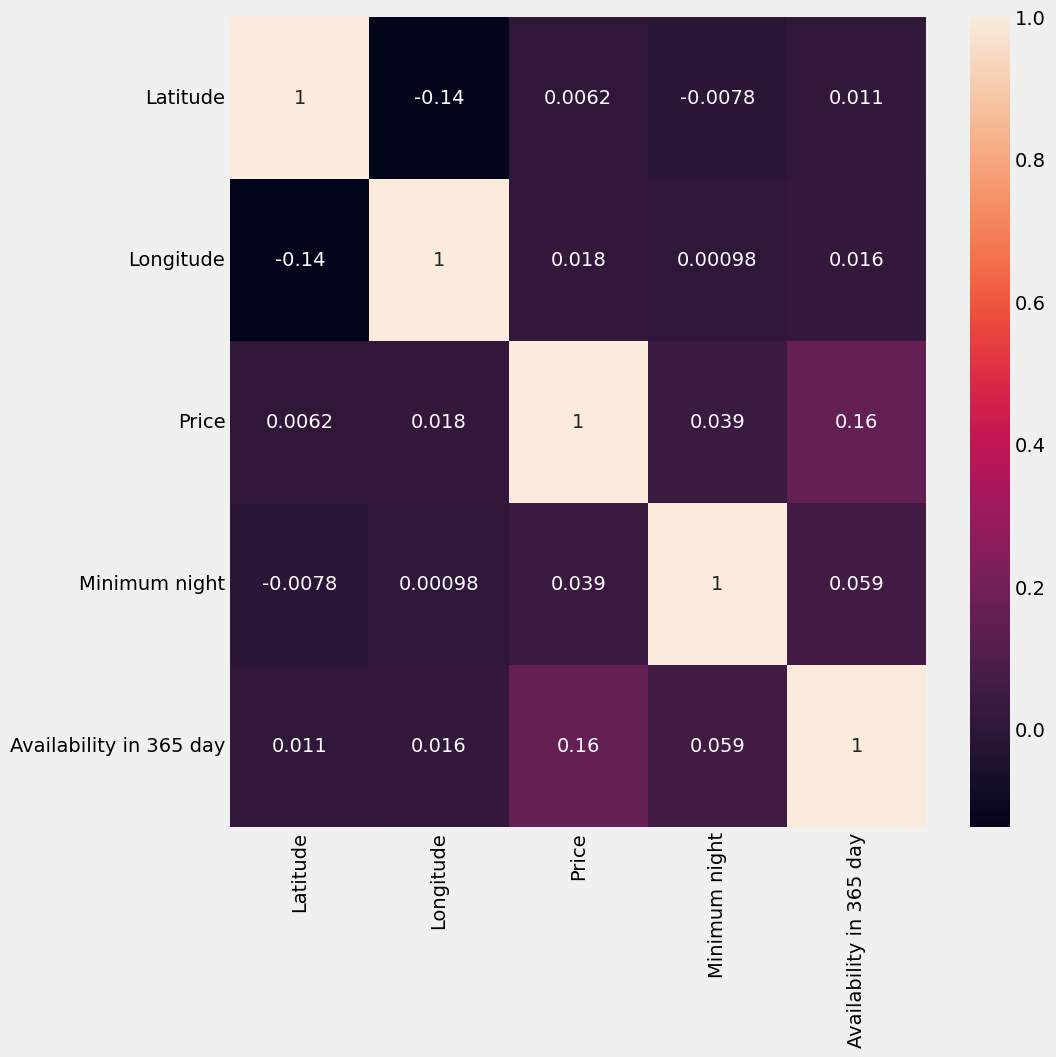

In [139]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

##### Scatterplots

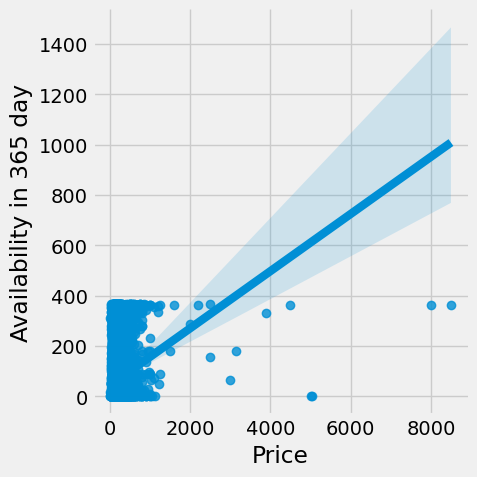

In [140]:
### Scatterplots
# Create a scatterplot for the "Price" and "Availability in 365 day" columns in seaborn.
sns.lmplot(x = 'Price', y = 'Availability in 365 day', data = df_1)

##### There is a slight positive correlation between 'Price and 'Availability within 365 day. Most points are too far away from the line.

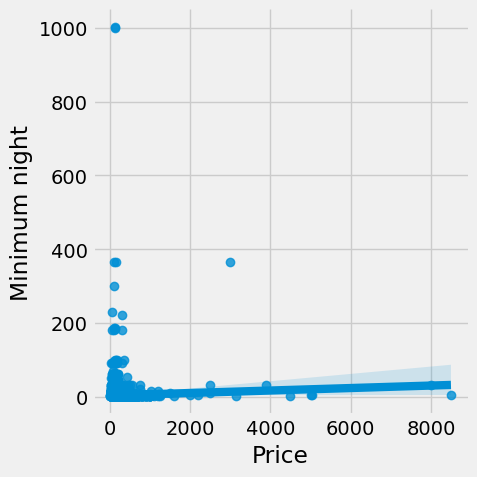

In [141]:
### Scatterplots
# Create a scatterplot for the "Price" and "Minimum night" columns in seaborn.
sns.lmplot(x = 'Price', y = 'Minimum night', data = df_1)

##### Pair Plots

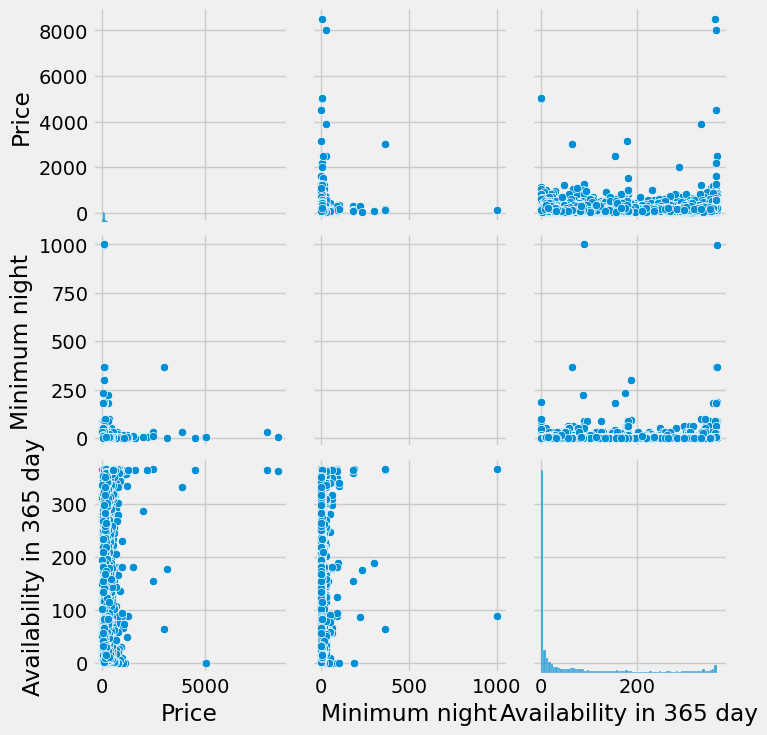

In [142]:
###### Create a pair plot
sub_2 = sub[['Price', 'Minimum night', 'Availability in 365 day']]
g = sns.pairplot(sub_2)

####### There seems to be a correlation between the vaiables: Price and Minimum nights, while there is no correlation between the others. 

##### Categorical Plots:

<AxesSubplot:xlabel='Availability in 365 day', ylabel='Count'>

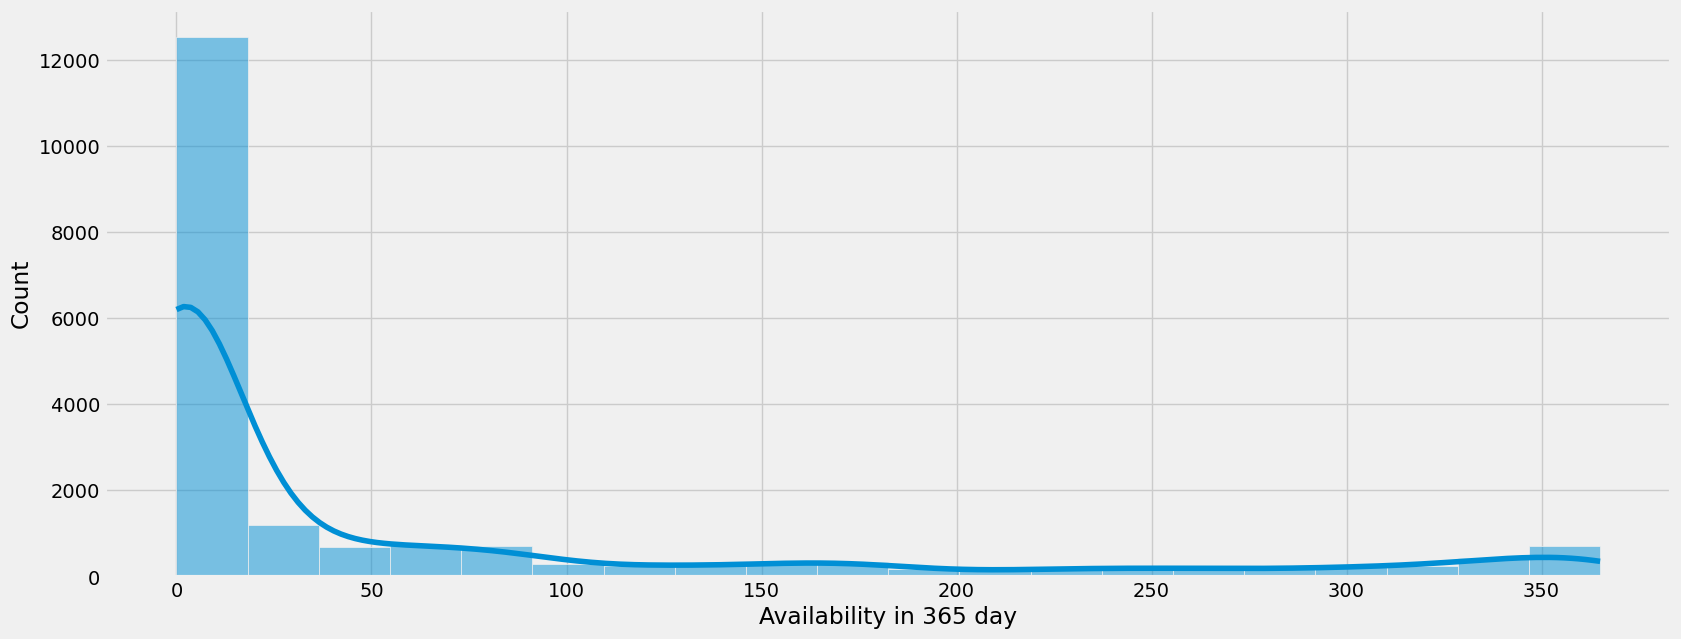

In [143]:
##### Creating a categorical variable that splits the "Availability in 365 day" column into categories.
sns.histplot(sub_2['Availability in 365 day'], bins = 20, kde = True)

#####  The Histogram shows that the houses that had less than 50 days in a 365 days has the highest frequency.

In [144]:
### Category 'Availability within 365 day'
sub_2.loc[sub_2['Availability in 365 day'] < 80, 'Availability in 365 day category'] = 'High Availability in 365 day category'
sub_2.loc[sub_2['Availability in 365 day'] >= 310, 'Availability in 365 day category'] = 'Medium Availability in 365 day category'  
sub_2.loc[(sub_2['Availability in 365 day'] >= 80) & (sub_2['Availability in 365 day'] < 310), 'Availability in 365 day category'] = 'Low Availability within 365 day category'
sub_2['Availability in 365 day category'].value_counts(dropna = True)

High Availability in 365 day category       15386
Low Availability within 365 day category     3205
Medium Availability in 365 day category      1401
Name: Availability in 365 day category, dtype: int64

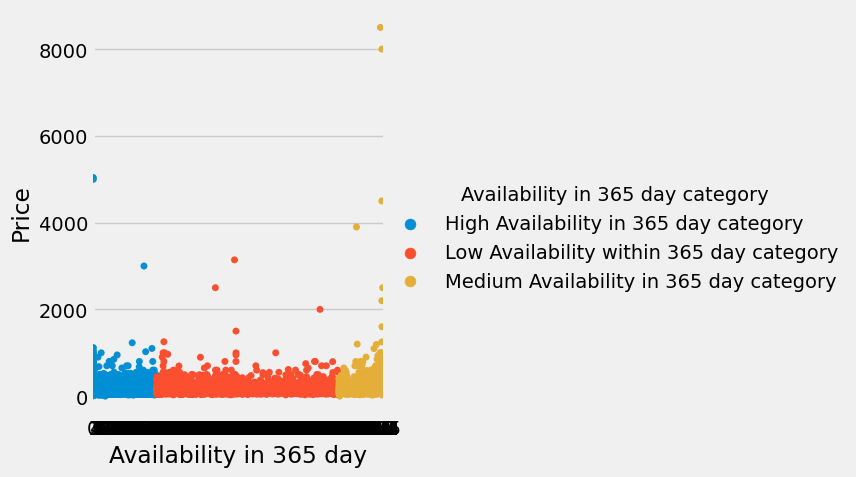

In [145]:
#### Create a categorical plot in seaborn using the Availability within 365 day category categories created above
g = sns.catplot(x="Availability in 365 day", y="Price", hue="Availability in 365 day category", data=sub_2)     

##### There is no correlation between 'Availability within 365 day and Price'.
##### From the exploration done so far, it is obvious that there seems to be a correlation only between Price and Minimum nights, while there is no correlation between the others. 

In [146]:
sub_3 = sub

<AxesSubplot:xlabel='Minimum night', ylabel='Count'>

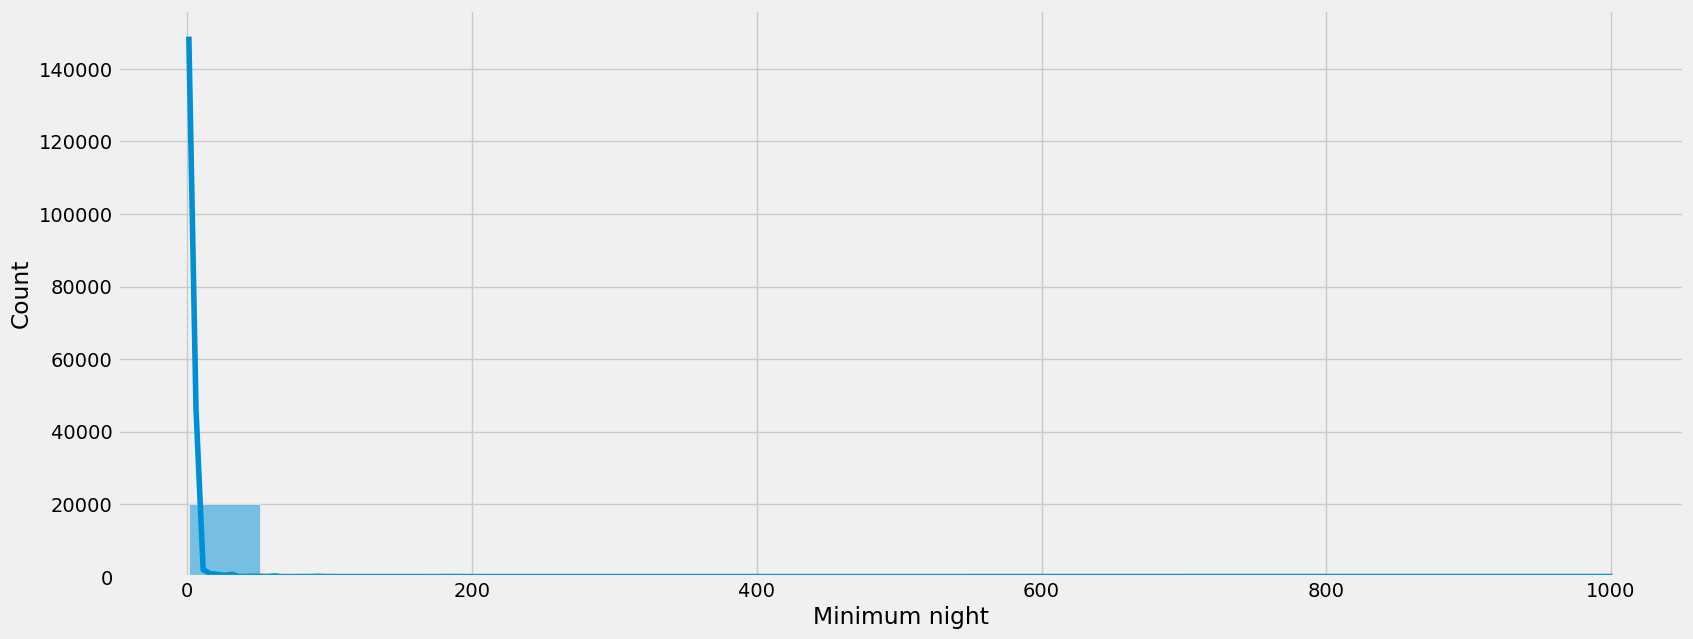

In [147]:
### Categorical Plots:
##### Creating a categorical variable that splits the "Minimum night" column into categories.
sns.histplot(sub_3['Minimum night'], bins = 20, kde = True)

In [148]:
### Category 'Minimum nights'
sub_3.loc[sub_3['Minimum night'] < 50, 'Minimum night category'] = 'High Minimum night category'
sub_3.loc[sub_3['Minimum night'] >= 50, 'Minimum night category'] = 'Low Minimum night category'  
sub_3['Minimum night category'].value_counts(dropna = True)

High Minimum night category    19930
Low Minimum night category        62
Name: Minimum night category, dtype: int64

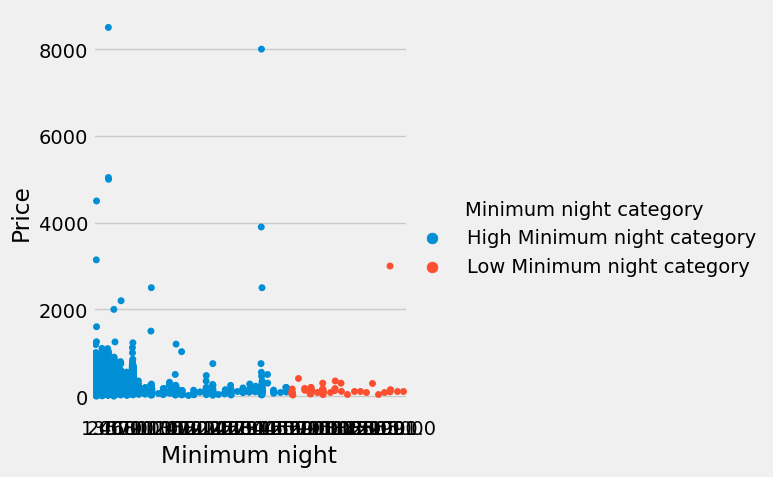

In [149]:
#### Create a categorical plot in seaborn using the Minimum nights created above
g = sns.catplot(x="Minimum night", y="Price", hue="Minimum night category", data=sub_3)  

##### Regression Analysis

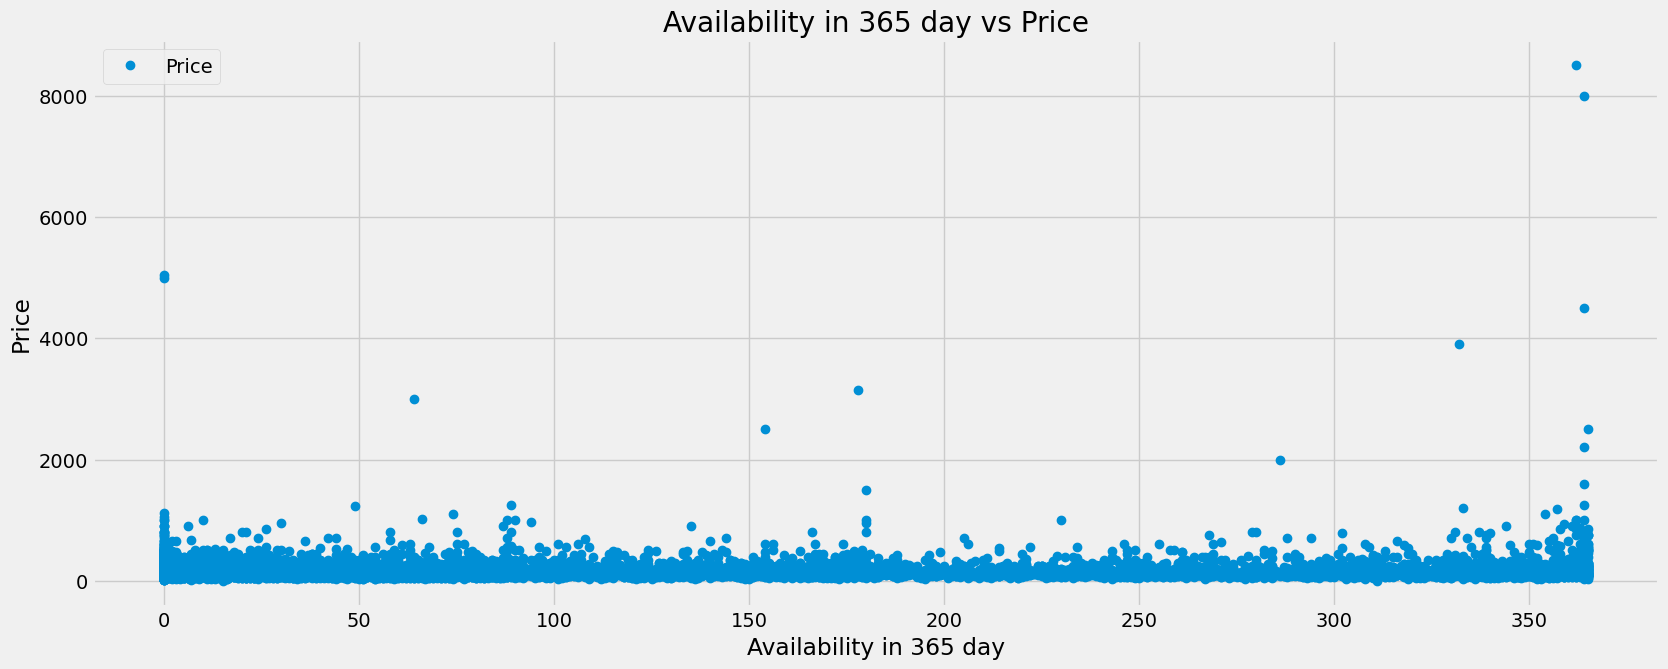

In [150]:
## Regression Analysis of Availability in 365 day and Price.
#####To test this hypothesis, I’ll run a simple linear regression with a single independent variable. independent variable-Availability within 365 day,x and dependent variable, Price
##### Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

sub_2.plot(x = 'Availability in 365 day', y='Price',style='o')
plt.title('Availability in 365 day vs Price') 
plt.xlabel('Availability in 365 day')  
plt.ylabel('Price')
plt.show()

In [151]:
#####  Reshape the variables into NumPy arrays and put them into separate objects.
X = sub_2['Availability in 365 day'].values.reshape(-1,1)
y = sub_2['Price'].values.reshape(-1,1)
X 

array([[ 44],
       [ 47],
       [198],
       ...,
       [210],
       [ 31],
       [ 14]], dtype=int64)

In [152]:
y

array([[ 59],
       [160],
       [ 80],
       ...,
       [ 80],
       [ 55],
       [220]], dtype=int64)

In [153]:
##### Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [154]:
#### Create a regression object
regression = LinearRegression()
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [155]:
#### Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

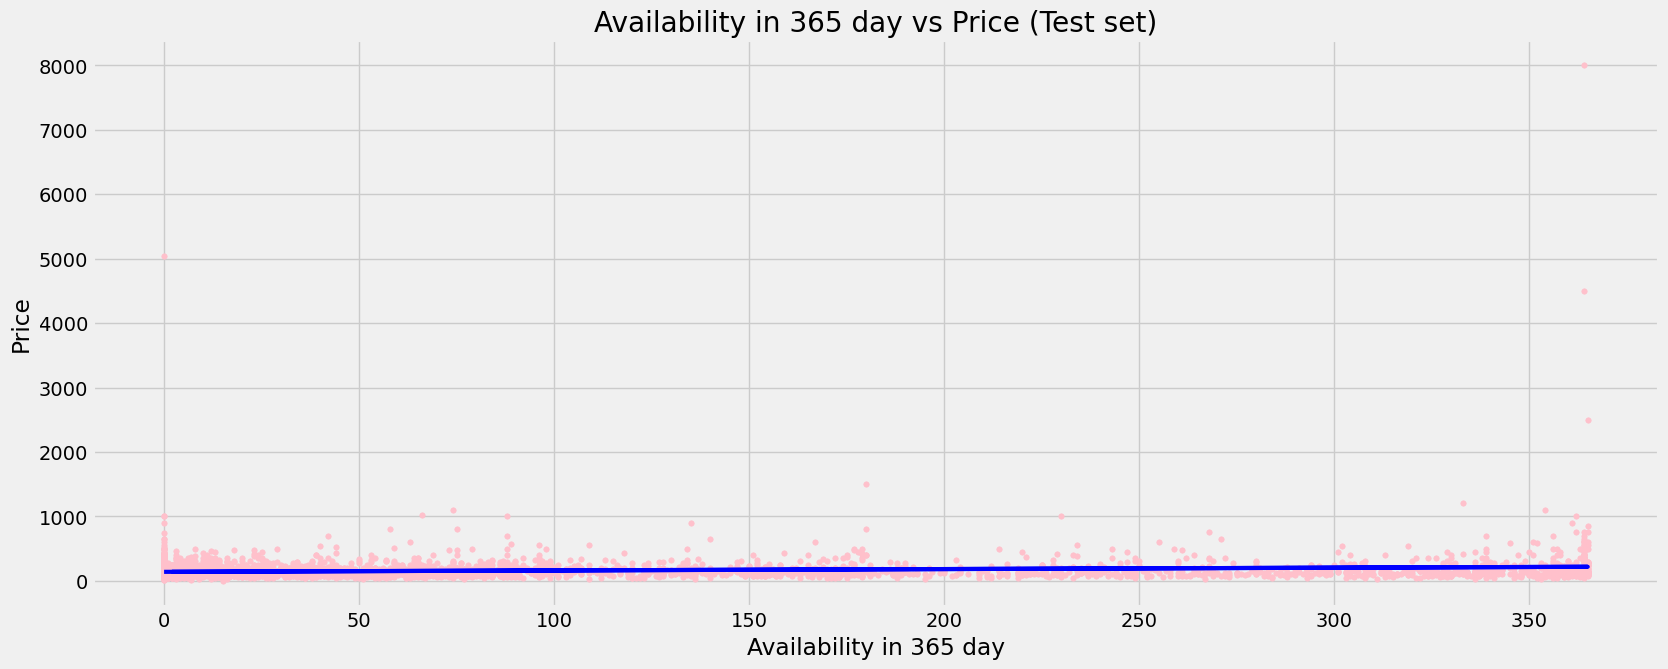

In [156]:
#### Predict the values of y using X
#### Create a plot that shows the regression line from the model on the test set
y_predicted = regression.predict(X_test)
plot_test = plt
plot_test.scatter(X_test, y_test, color='pink', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Availability in 365 day vs Price (Test set)')
plot_test.xlabel('Availability in 365 day')
plot_test.ylabel('Price')
plot_test.show()

In [157]:
#### Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [158]:
#### Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.21491517]]
Mean squared error:  26632.73341209231
R2 score:  0.0232429011472175


##### The slope here means that as X rises (as theAvailability within 365 day rises), y slightly drops (the price per unit drops) at a degree of 0.21491517

In [159]:
#### Create a dataframe comparing the actual and predicted values of y
y_predicted

array([[139.27638848],
       [139.27638848],
       [139.27638848],
       ...,
       [152.38621403],
       [139.70621882],
       [139.70621882]])

In [160]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,140,139.276388
1,150,139.276388
2,222,139.276388
3,200,139.276388
4,200,139.276388
5,28,139.276388
6,130,139.276388
7,100,139.276388
8,149,209.983480
9,129,214.711614


#### The models outcome on the training set is not similar to that on the test set.  With the MSE being even larger on the train set. Confirming that this is not a good model to use. This proves that the Availability within 365 day are not the driving factor of pricing. There might be other variables contributing to the pricing apart from the Availability within 365 day.

In [161]:
##### Compare how the regression fits the training set
#### Predict
y_predicted_train = regression.predict(X_train) ## This is predicting X_train

rmse = mean_squared_error(y_train, y_predicted_train) 
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.21491517]]
Mean squared error:  18230.176893443106
R2 score:  0.026596631198837484


Slope: [[0.21491517]]
Mean squared error:  26632.73341209231
R2 score:  0.0232429011472175

##### The slope here means that as X rises (as Availability within 365 day rises), y slightly drops (the price per unit drops) at a degree of 0.21491517. A good MSE should be between 0.2 and 0.5, 18230.176893443106 is quite large. Meaning regression may not be the best model to represent this data and can’t accurately predict the influence of Availability within 365 day on the price. R2 score (btw 0 and 1), where values closer to 0 indicate a poor fit.
    
#### The models' outcome on the training set is similar to that of the one we have in the test set. Even more, the data points are more separated here than in the other set. This confirms that the model is not applicable either.    
    

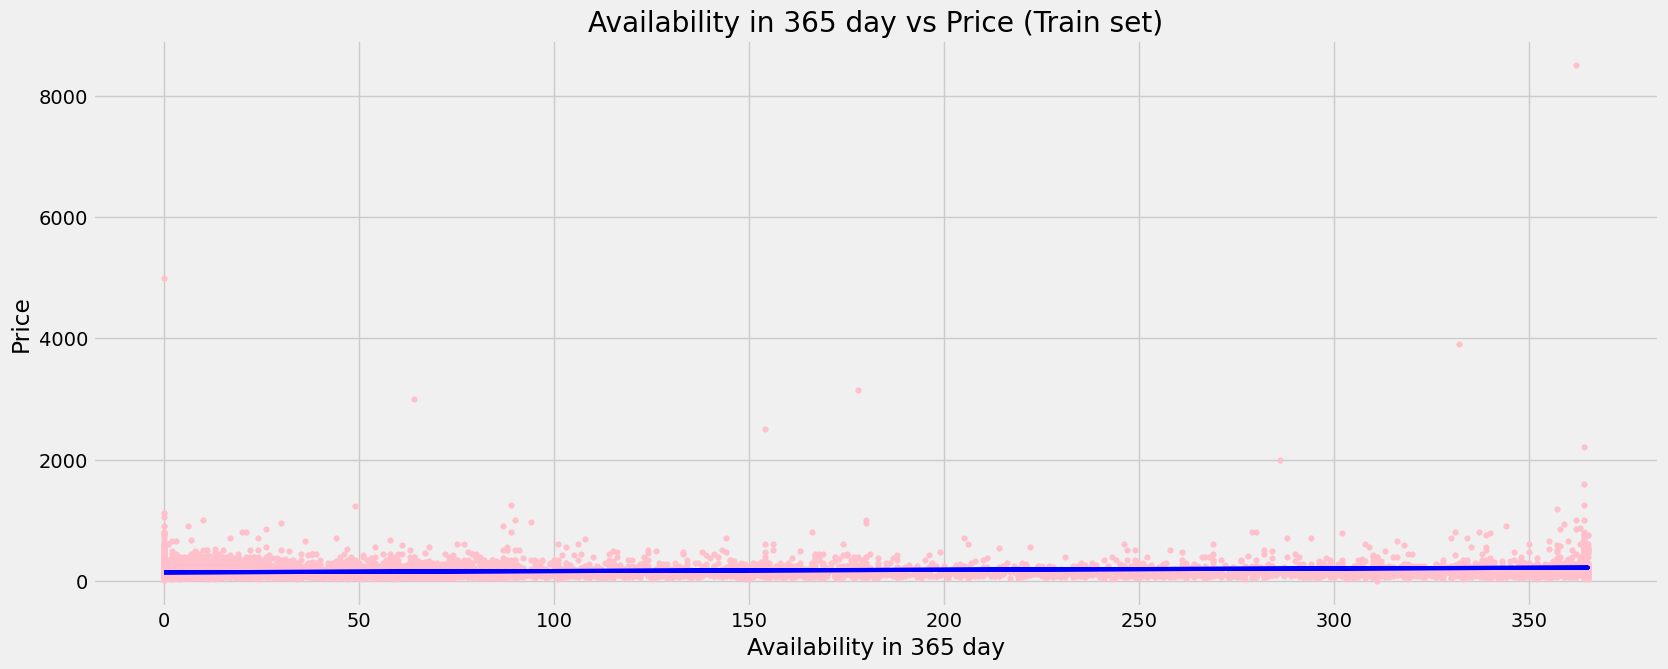

In [162]:
#### Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='pink', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Availability in 365 day vs Price (Train set)')
plot_test.xlabel('Availability in 365 day')
plot_test.ylabel('Price')
plot_test.show()

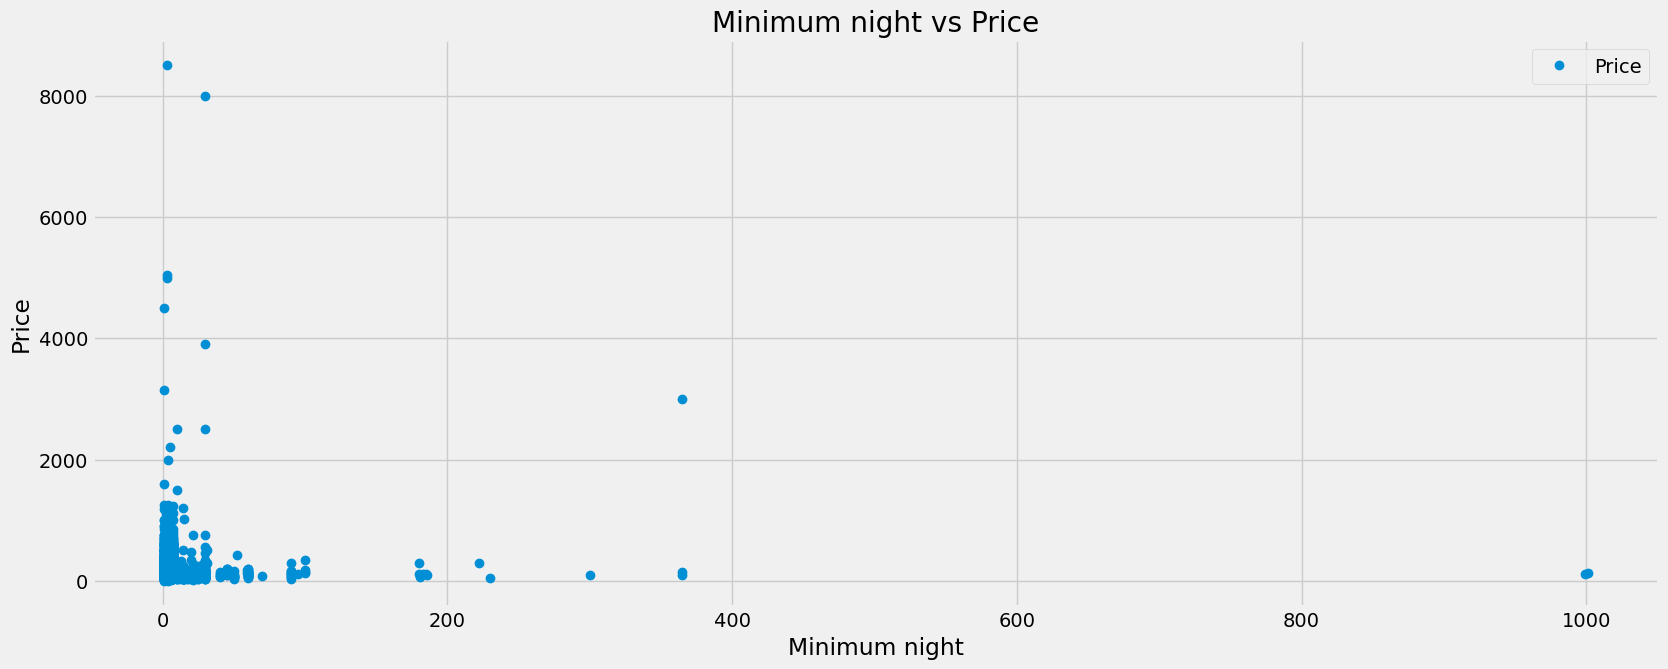

In [163]:
## Regression Analysis of Minimum nights and Price.
##### To test this hypothesis, I’ll run a simple linear regression with a single independent variable. independent variable-Minimum nights,x and dependent variable, Price
##### Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

sub_2.plot(x = 'Minimum night', y='Price',style='o')
plt.title('Minimum night vs Price') 
plt.xlabel('Minimum night')  
plt.ylabel('Price')
plt.show()

In [164]:
#####  Reshape the variables into NumPy arrays and put them into separate objects.
X = sub_2['Minimum night'].values.reshape(-1,1)
y = sub_2['Price'].values.reshape(-1,1)
X 

array([[ 3.],
       [ 4.],
       [ 1.],
       ...,
       [10.],
       [ 2.],
       [ 5.]])

In [165]:
y

array([[ 59],
       [160],
       [ 80],
       ...,
       [ 80],
       [ 55],
       [220]], dtype=int64)

In [166]:
##### Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [167]:
#### Create a regression object
regression = LinearRegression()
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [168]:
#### Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

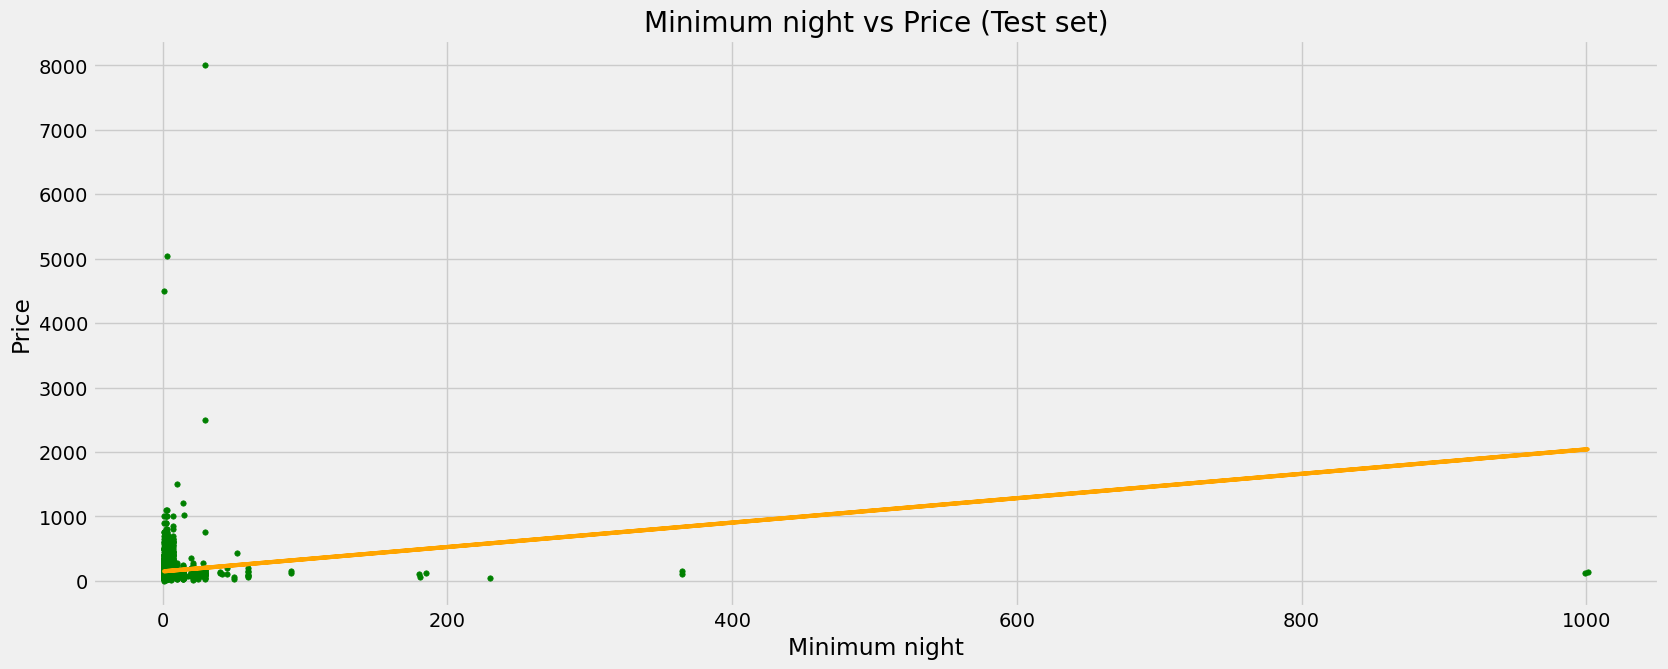

In [169]:
#### Predict the values of y using X
#### Create a plot that shows the regression line from the model on the test set
y_predicted = regression.predict(X_test)
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Minimum night vs Price (Test set)')
plot_test.xlabel('Minimum night')
plot_test.ylabel('Price')
plot_test.show()

In [170]:
#### Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [171]:
#### Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.89340198]]
Mean squared error:  28632.316812900586
R2 score:  -0.050091940277691815


##### The slope here means that as X rises (as the Minimum nights rises), y increases (the price per increases) at a degree of 1.89340198.

In [172]:
#### Create a dataframe comparing the actual and predicted values of y
y_predicted

array([[149.85025665],
       [151.74365864],
       [151.74365864],
       ...,
       [151.74365864],
       [149.85025665],
       [149.85025665]])

In [173]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,140,149.850257
1,150,151.743659
2,222,151.743659
3,200,147.956855
4,200,149.850257
5,28,164.997473
6,130,149.850257
7,100,149.850257
8,149,159.317267
9,129,149.850257


#### The models outcome on the training set is similar to that on the test set.  With the MSE being even larger on the train set. Confirming that this is not a good model to use. This proves that the Minimum nights are not the driving factor of pricing. There might be other variables contributing to the pricing apart from the Minimum nights.

In [174]:
##### Compare how the regression fits the training set
#### Predict
y_predicted_train = regression.predict(X_train) ## This is predicting X_train

rmse = mean_squared_error(y_train, y_predicted_train) 
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.89340198]]
Mean squared error:  18561.873012020056
R2 score:  0.008885661024038982


Slope: [[1.89340198]]
Mean squared error:  28632.316812900586
R2 score:  -0.050091940277691815

##### The slope here means that as X rises (as Minimum nights rises), y increases (the price increases) at a degree of 1.89340198. A good MSE should be between 0.2 and 0.5, 18561.873012020056 is quite large. Meaning regression may not be the best model to represent this data and can’t accurately predict the influence of Minimum nights on the price. R2 score (btw 0 and 1), where values closer to 0 indicate a poor fit.
    
#### The models' outcome on the training set is similar to that of the one we have in the test set. Even more, the data points are more separated here than in the other set. This confirms that the model is not applicable either.    
    

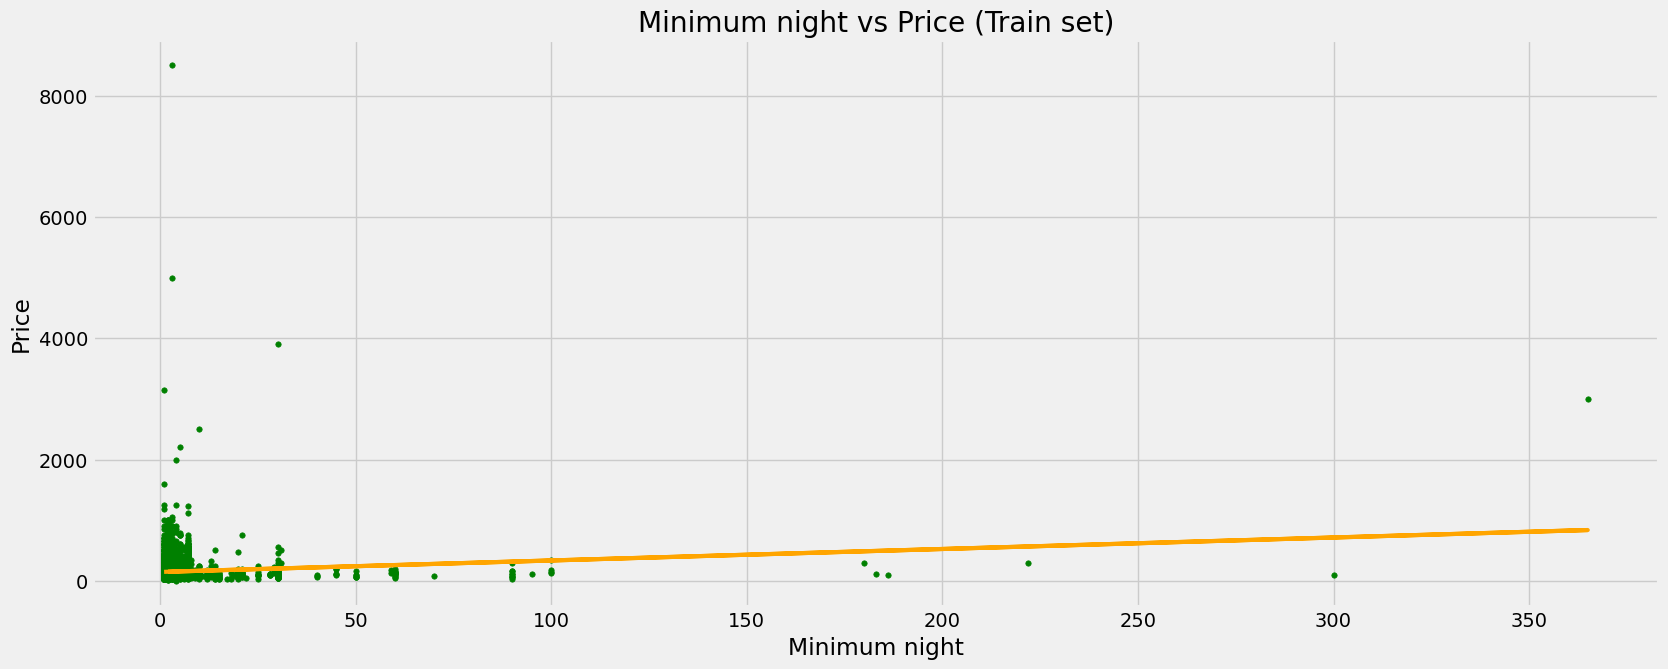

In [175]:
#### Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('Minimum night vs Price (Train set)')
plot_test.xlabel('Minimum night')
plot_test.ylabel('Price')
plot_test.show()

In [176]:
%matplotlib inline 
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

##### Create a subset including the 'Price', 'Minimum night', 'Availability in 365 day'
sub_4 = sub[['Price', 'Minimum night', 'Availability in 365 day']]

#  The elbow technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

score = [kmeans[i].fit(sub_4).score(sub_4) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.
score   

[-645301748.366047,
 -446376124.52813554,
 -256719971.3197476,
 -181544221.00104412,
 -141064077.9502402,
 -110946220.27276443,
 -98824940.25393151,
 -82392662.84258658,
 -67740206.48046383]

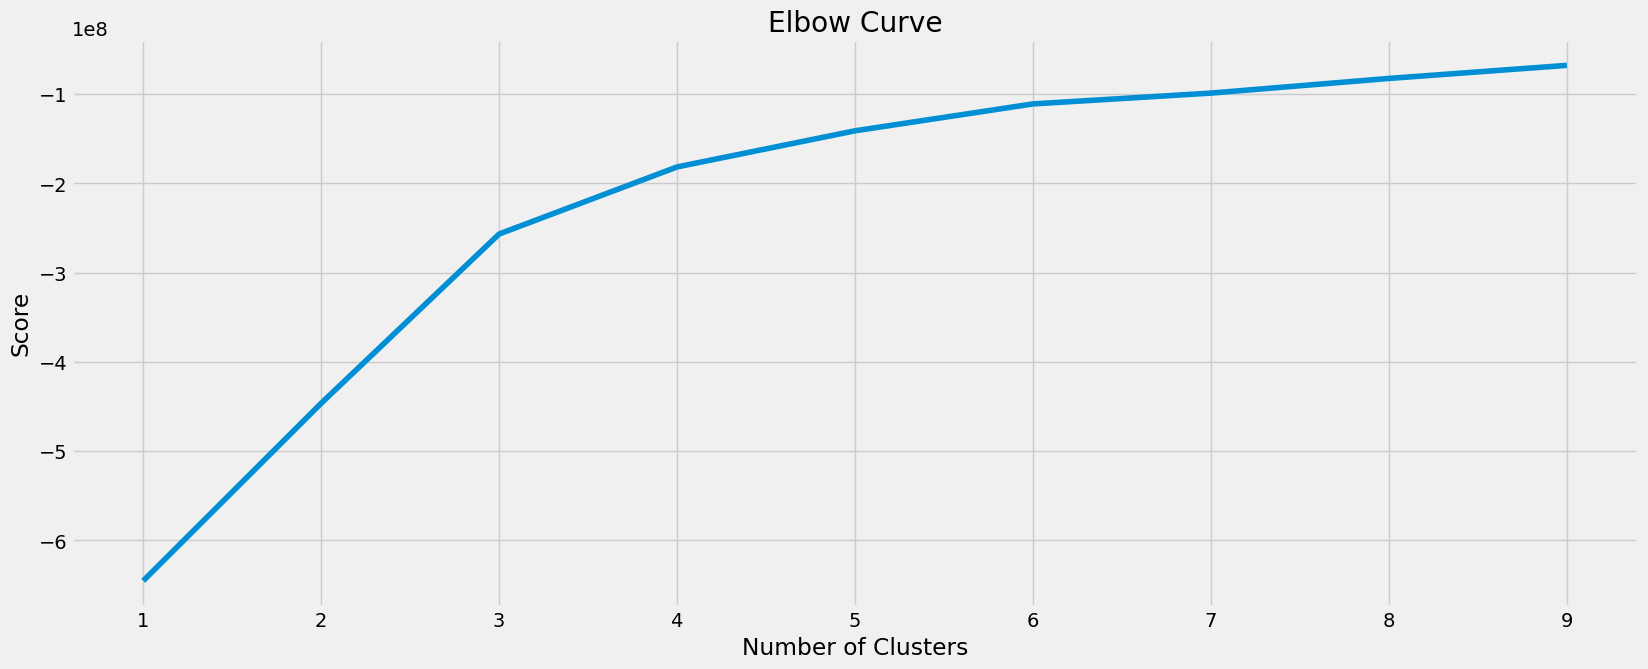

In [177]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this elbow, the optimal number of clusters is 4.  After the third one on the x-axis,  the curve straightens out. This means that the optimal count for your clusters is four.

##### k-means clustering

In [178]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4)

# Fit the k-means object to the data.
kmeans.fit(sub_4)

KMeans(n_clusters=4)

In [179]:
sub_4['clusters'] = kmeans.fit_predict(sub_4)
sub_4.head()

,Price,Minimum night,Availability in 365 day,clusters
0,59,3.0,44,0
1,160,4.0,47,0
2,80,1.0,198,2
3,125,14.0,141,0
4,150,2.0,199,2


In [180]:
sub_4['clusters'].value_counts()

0    15992
2     3041
1      951
3        8
Name: clusters, dtype: int64

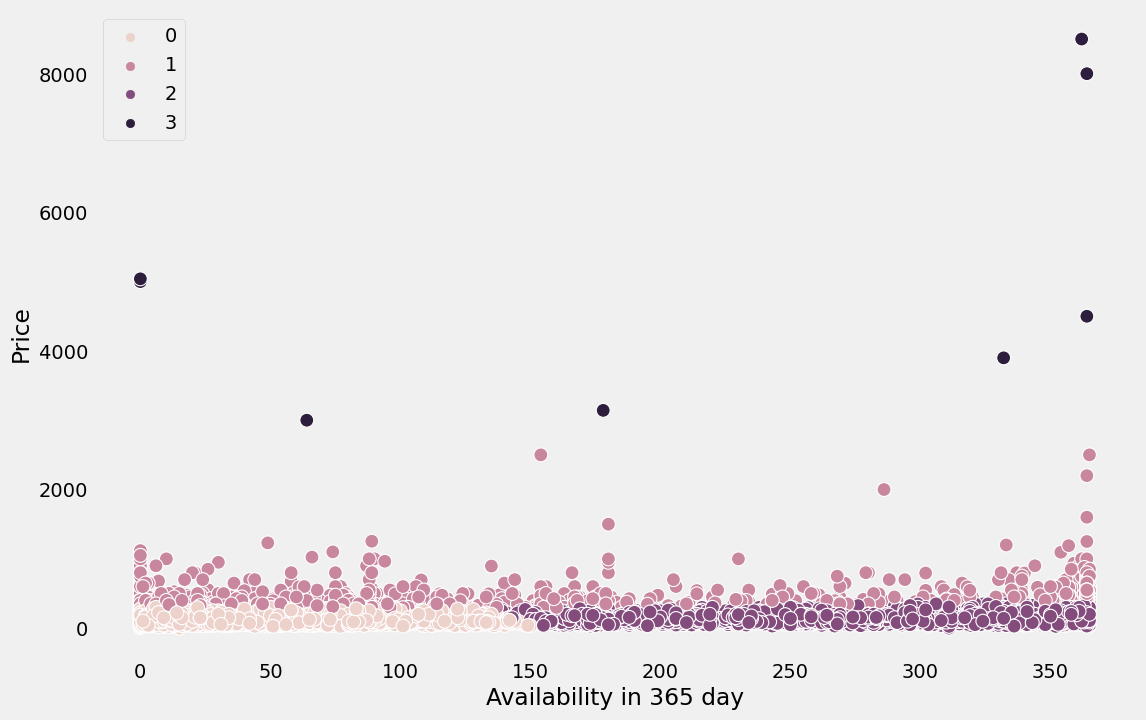

In [181]:
# Plot the clusters for the "Availability within 365 day" and "Price" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_4['Availability in 365 day'], y=sub_4['Price'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Availability in 365 day')
plt.ylabel('Price') 
plt.show()

#### The plot 'Availability within 365 day vs Price' shows there is no relationship between the two because all the colors overlapped up until the Availability within 365 day is about 150 days and the price rose to about 400, at these points, it became more distinct.

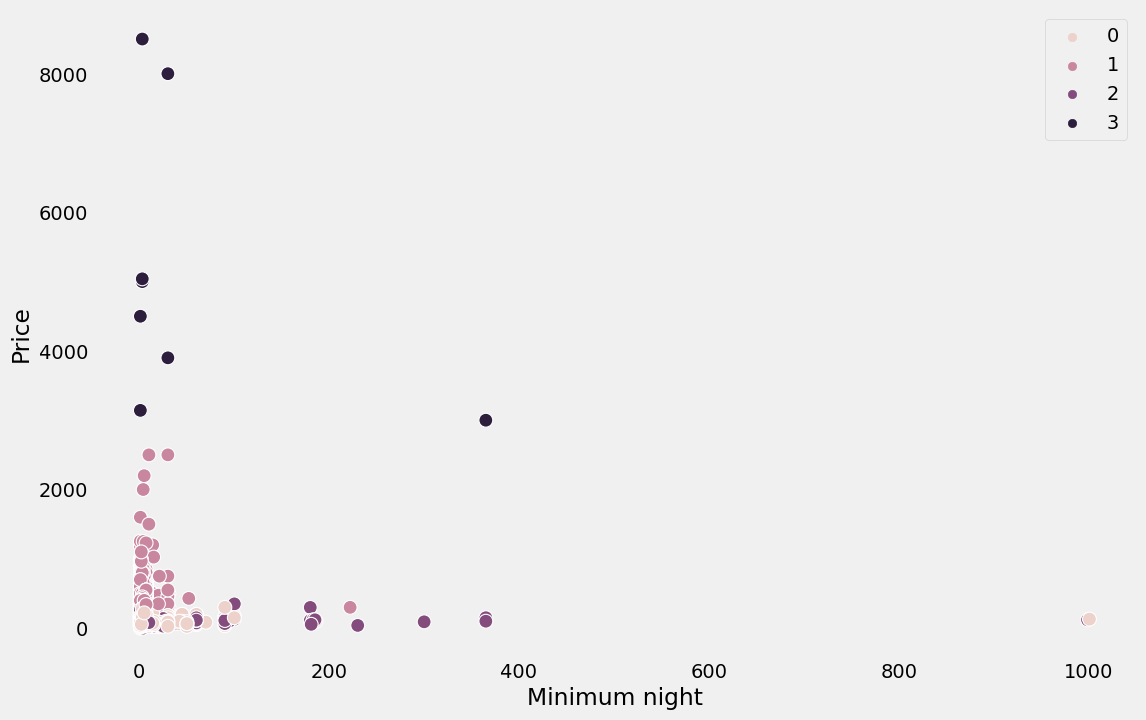

In [182]:
# Plot the clusters for the "Minimum night" and "Price" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_4['Minimum night'], y=sub_4['Price'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Minimum night')
plt.ylabel('Price') 
plt.show()

#### The plot 'Minimum nights vs Price' shows there is no relationship between the two because all the colors overlapped up until the Minimum nights is about 210 and the price rose to about 400, at these points, it became more distinct.

In [183]:
# Group by colors
sub_4.loc[sub_4['clusters'] == 2, 'cluster'] = 'dark purple'
sub_4.loc[sub_4['clusters'] == 3, 'cluster'] = 'purple'
sub_4.loc[sub_4['clusters'] == 1, 'cluster'] = 'dark pink'
sub_4.loc[sub_4['clusters'] == 0, 'cluster'] = 'pink'


In [184]:
# Examine descriptive cluster statistics
sub_4.groupby('cluster').agg({'Availability in 365 day':['mean', 'median'], 
'Minimum night':['mean', 'median'], 
'Price':['mean', 'median']})

Availability in 365 day        Minimum night               Price  \
                               mean median          mean median         mean   
cluster                                                                        
dark pink                124.083070   79.0      3.626709    3.0   459.190326   
dark purple              270.268990  283.0      4.612956    2.0   149.641236   
pink                      16.141633    0.0      3.041771    2.0   131.985618   
purple                   208.000000  255.0     54.500000    3.0  5135.250000   

                     
             median  
cluster              
dark pink     400.0  
dark purple   140.0  
pink          120.0  
purple       4750.0

#### The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. It would maybe provide a more holistic view on what in fact influences the Operating Profit variable.

##### Time Series Analysis

##### Configure API key   
quandl.ApiConfig.api_key = 'ef6U9zBqS7DpP3sny-Ak'

##### Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.
data = quandl.get('FRED/NROU')
data.shape

In [185]:
# Create a subset
df1 = sub_4[['Availability in 365 day' , 'Price']]
df1.shape

(19992, 2)

In [186]:
df1.head(5)

,Availability in 365 day,Price
0,44,59
1,47,160
2,198,80
3,141,125
4,199,150


In [187]:
type(df1)

pandas.core.frame.DataFrame

In [188]:
# Reset index so that you can use the "Availability in 365 day" column as a filter
df1 = df1.set_index('Availability in 365 day') # Set the Availability in 365 day as the index of the dataframe
df1.head()

,Price
Availability in 365 day,
44,59
47,160
198,80
141,125
199,150


In [189]:
df1.sort_values(by='Availability in 365 day', inplace = True)
df2 = df1.duplicated()
df2 = df1.drop_duplicates()

In [190]:
df2

,Price
Availability in 365 day,
0,120
0,150
0,211
0,180
0,110
...,...
364,8000
364,510
364,1250


In [191]:
df2.sort_values(by='Availability in 365 day', inplace = True)

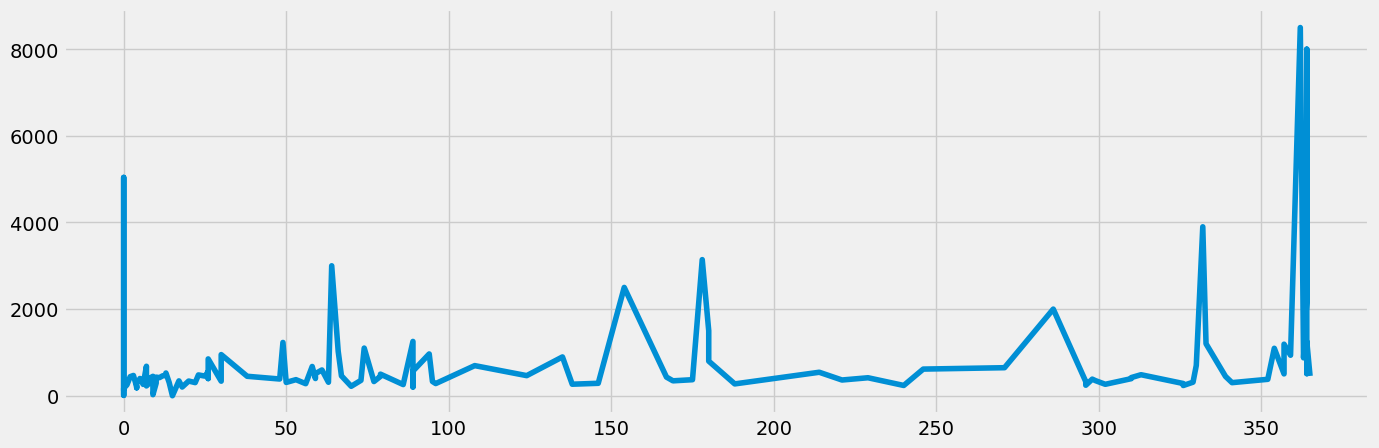

In [192]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!
plt.plot(df2)

##### Time-series analysis: decomposition

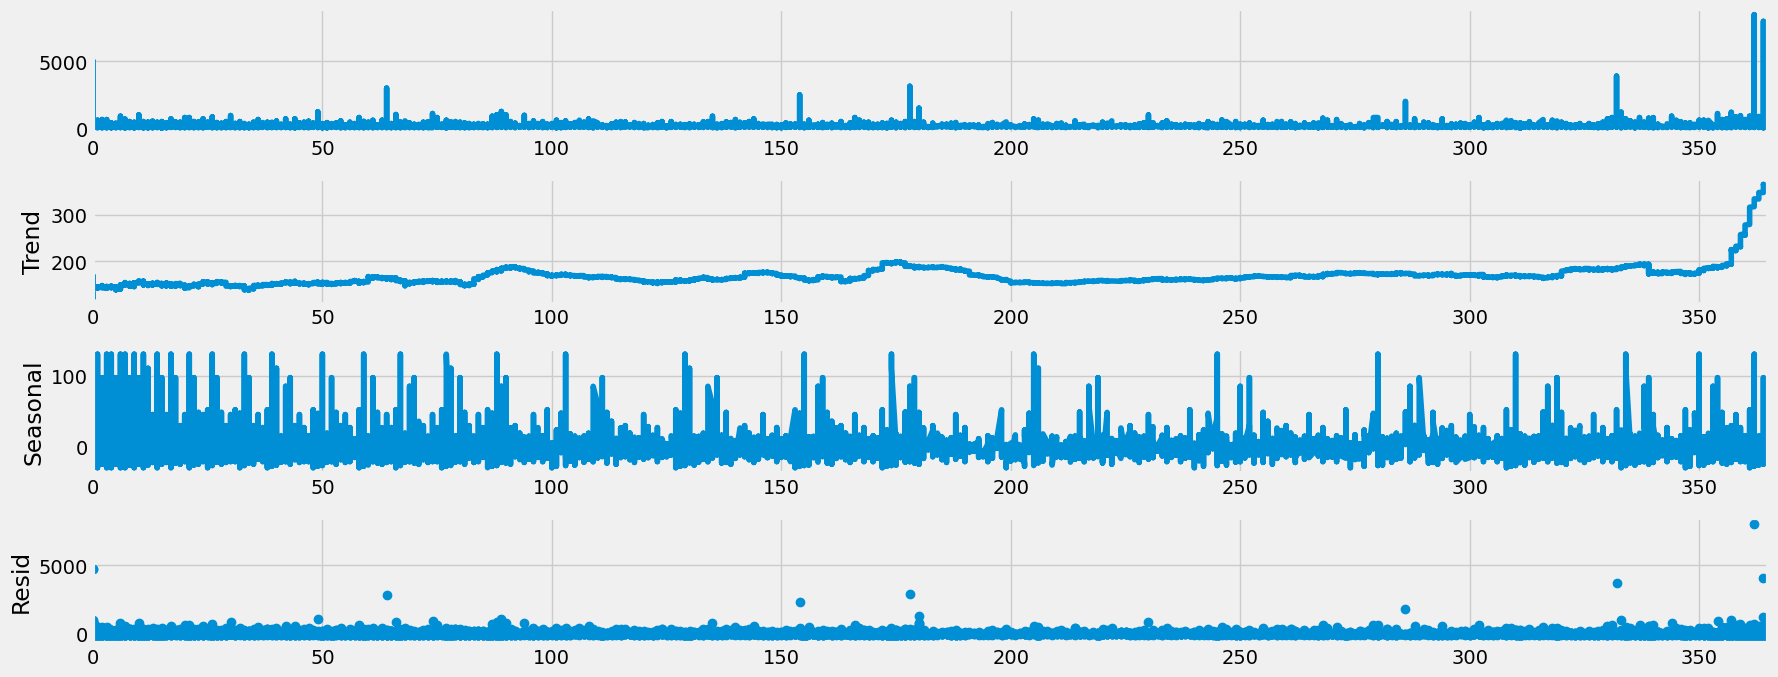

In [193]:
### Time-series analysis: decomposition
# Decompose the time series using an additive model   
decomposition = sm.tsa.seasonal_decompose(df1, model='additive', period=365)

from pylab import rcParams # This will define a fixed size for all special charts.  
rcParams['figure.figsize'] = 18, 7

# Plot the separate components
decomposition.plot()
plt.show()

##### The first graph we see is the data itself with all its components, called the level.
##### The second graph is the trend in this graph.
##### The third component is seasonality. 
##### And finally we see in the last graph the noise.

In [194]:
# Create a subset
df3 = sub_4[['Minimum night' , 'Price']]
df3.shape

(19992, 2)

In [195]:
df3.head(5)

,Minimum night,Price
0,3.0,59
1,4.0,160
2,1.0,80
3,14.0,125
4,2.0,150


In [196]:
type(df3)

pandas.core.frame.DataFrame

In [197]:
# Reset index so that you can use the "Minimum nights" column as a filter
df3 = df3.set_index('Minimum night') # Set the Minimum nights as the index of the dataframe
df3.head()

,Price
Minimum night,
3.0,59
4.0,160
1.0,80
14.0,125
2.0,150


In [198]:
df3.sort_values(by='Minimum night', inplace = True)
df4 = df3.duplicated()
df4 = df3.drop_duplicates()

In [199]:
df4

,Price
Minimum night,
1.0,100
1.0,98
1.0,245
1.0,53
1.0,67
...,...
15.0,1025
30.0,8000
30.0,3900


In [200]:
df4.sort_values(by='Minimum night', inplace = True)

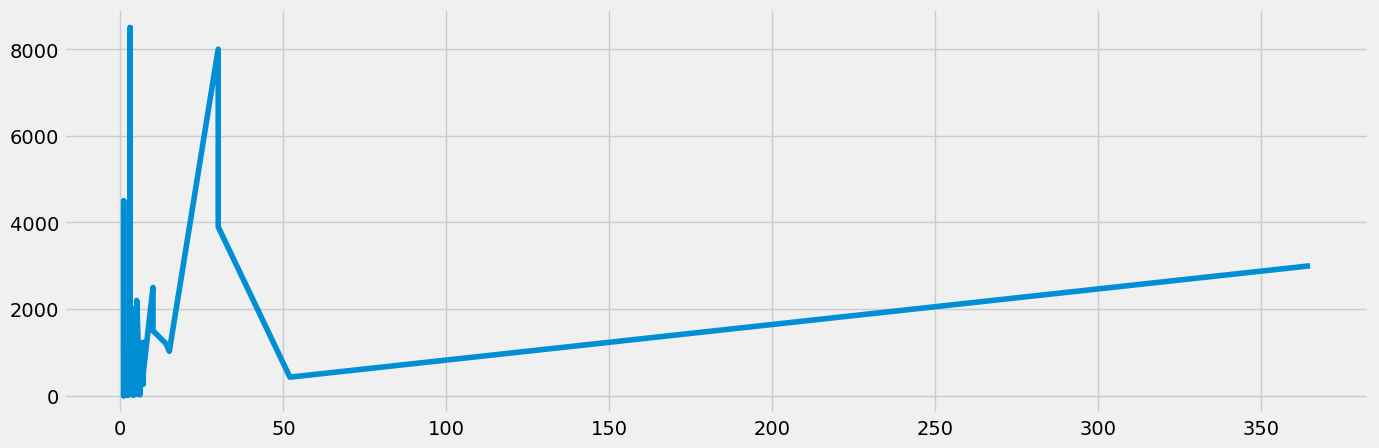

In [201]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!
plt.plot(df4)

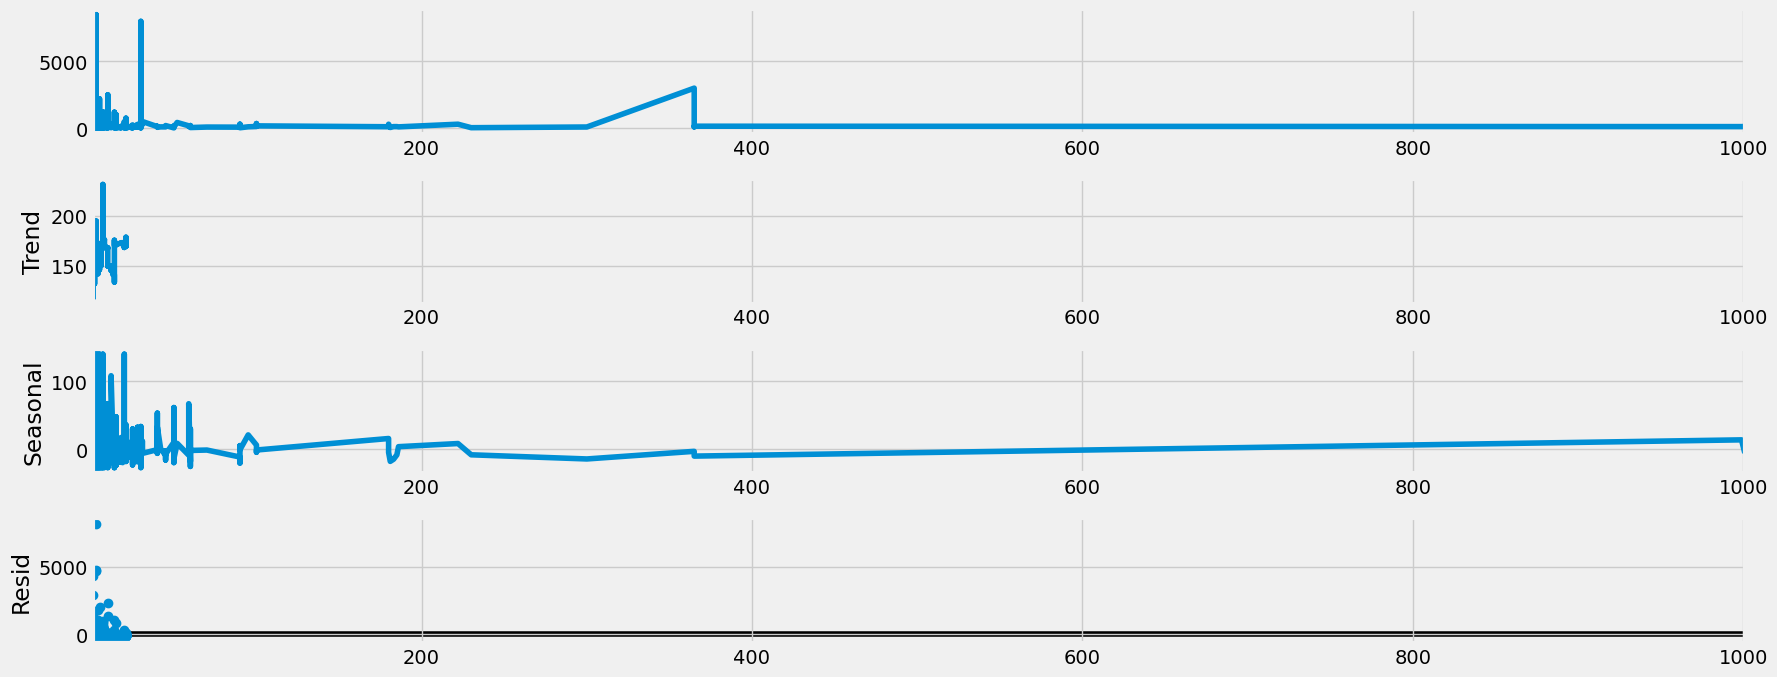

In [202]:
### Time-series analysis: decomposition
# Decompose the time series using an additive model   
decomposition = sm.tsa.seasonal_decompose(df3, model='additive', period=365)

from pylab import rcParams # This will define a fixed size for all special charts.  
rcParams['figure.figsize'] = 18, 7

# Plot the separate components
decomposition.plot()
plt.show()

##### The first graph we see is the data itself with all its components, called the level.
##### The second graph is the trend in this graph.
##### The third component is seasonality. 
##### And finally we see in the last graph the noise.

##### Testing for stationarity

In [203]:
### Testing for stationarity

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
    # an array of numbers. This is why you need to also define a function that prints the correct output from that array.
    
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function
    
def dickey_fuller(timeseries): # Define the function
        # Perform the Dickey-Fuller test:
        print ('Dickey-Fuller Stationarity test:')
        test = adfuller(timeseries, autolag='AIC')
        result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
        for key,Price in test[4].items():
           result['Critical Value (%s)'%key] = Price
        print (result)
    
# Apply the test using the function on the time series
dickey_fuller(df2['Price'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.199075
p-value                          0.206581
Number of Lags Used              8.000000
Number of Observations Used    420.000000
Critical Value (1%)             -3.446016
Critical Value (5%)             -2.868446
Critical Value (10%)            -2.570449
dtype: float64


#### A “significant” result would be a p-value of less than 0.05.



##### Test Statistics=  0.636920 > Critical value=  -2.868446 so I can’t reject the null hypothesis. It means that there is a unit root in my data, and my data is non-stationary. 
##### significance level of 5% used =  -2.868446
##### The null hypothesis is not rejected
##### The data is non-stationary
   
##### This means that there is a unit root in the data

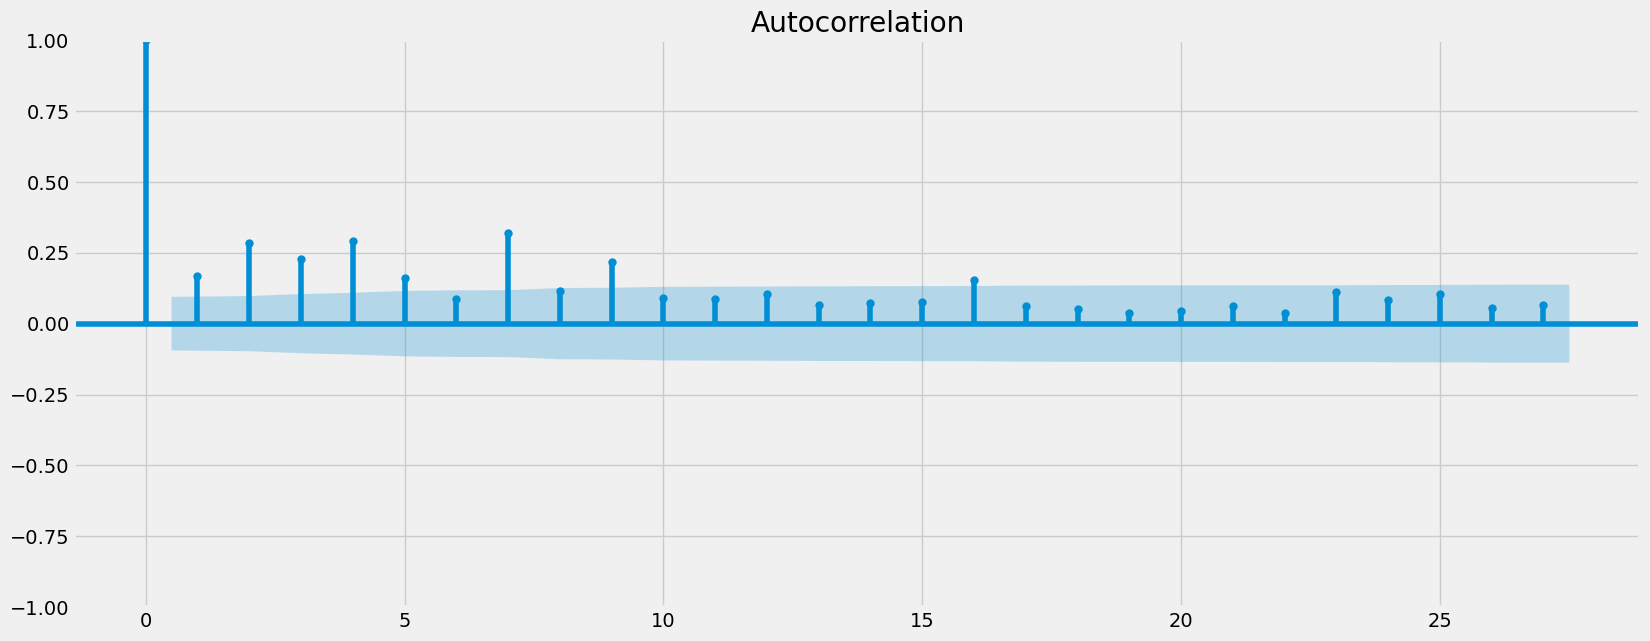

In [204]:
# Check out a plot of autocorrelations
  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

##### When there are fewer lines that exceed the blue border of the confidence interval, it means that you have lags that are not significantly correlated with each other. The line are not up to ten that are above the confidence interval, so the data is somewhat stationery.

In [205]:
## Stationarizing the Availability in 365 day
##### First Stationarizing using Differencing method
df2_diff_1 = df2 - df2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
df2_diff_1.head()

,Price
Availability in 365 day,
0,NaN
0,879.0
0,-953.0
0,299.0
0,-274.0


In [206]:
df2_diff_1.columns

Index(['Price'], dtype='object')

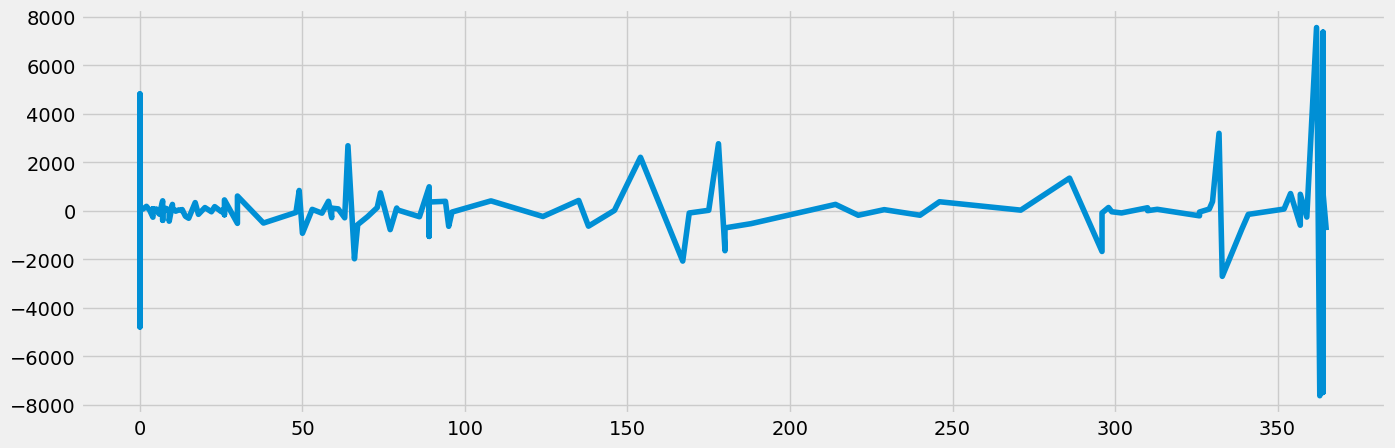

In [207]:
df2_diff_1.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2_diff_1)

In [208]:
dickey_fuller(df2_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                -8.628890e+00
p-value                        5.828100e-14
Number of Lags Used            1.400000e+01
Number of Observations Used    4.130000e+02
Critical Value (1%)           -3.446283e+00
Critical Value (5%)           -2.868564e+00
Critical Value (10%)          -2.570511e+00
dtype: float64


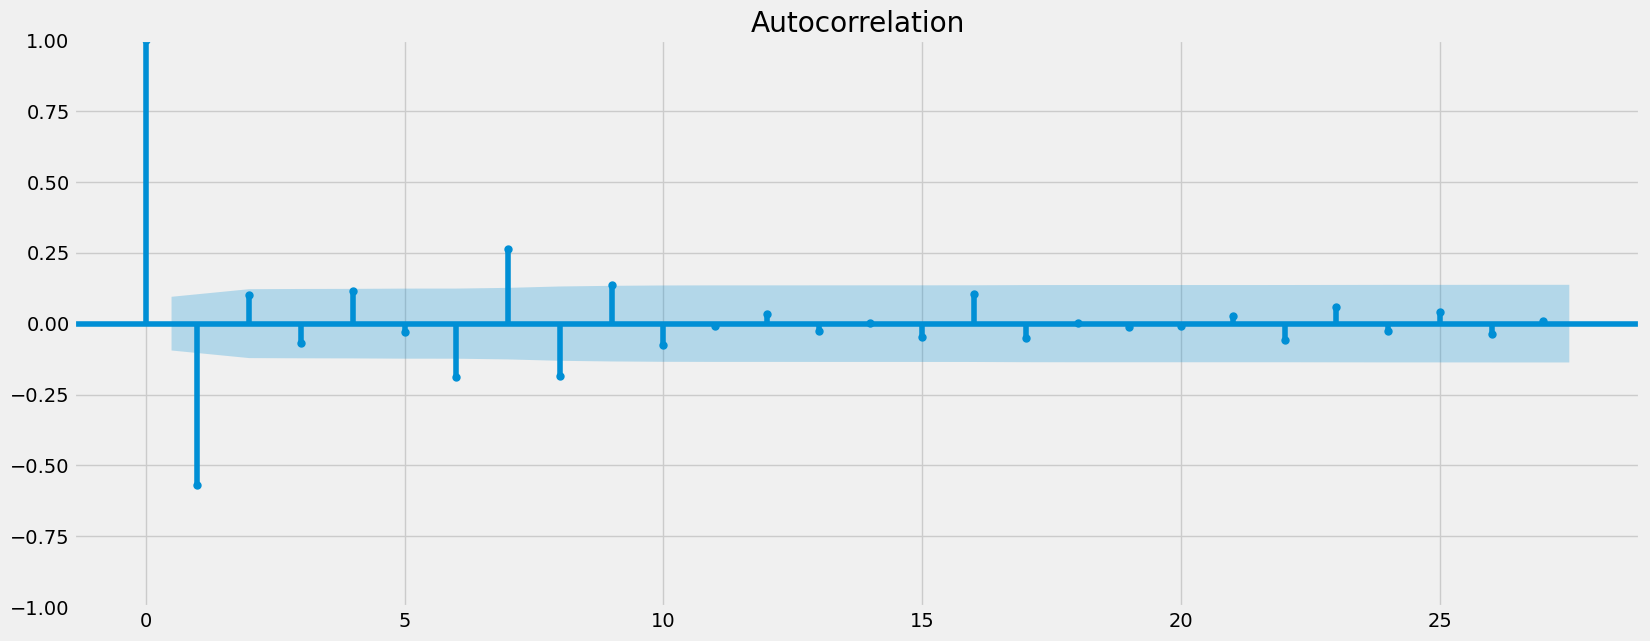

In [209]:
plot_acf(df2_diff_1)
plt.show()

# 4. Exporting the data

In [210]:
df2_diff_1.to_csv(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'listings_check.csv'))